In [1]:
from record_1_1 import DynamicResidualModelStrategy
from datetime import datetime
from vnpy.app.portfolio_strategy import BacktestingEngine
from vnpy.trader.constant import Interval
import pandas as pd
from pyecharts.charts import (Bar,Line,Graph,Gauge,Page)#柱状图，折线图，关系图，仪表盘,多图同表
from pyecharts import options as opts
import numpy as np
import random
import talib

In [4]:
engine = BacktestingEngine()
engine.clear_data()

engine.set_parameters(
    vt_symbols=["HC888.SHFE", 'RB888.SHFE'],
    interval=Interval.MINUTE,
    start=datetime(2014, 12, 31),
    end=datetime(2019, 5, 14),
    rates={"HC888.SHFE": 5/10000, "RB888.SHFE": 5/10000},
    slippages={"HC888.SHFE":2, "RB888.SHFE":1},
    sizes={"HC888.SHFE":10, "RB888.SHFE":10},
    priceticks={"HC888.SHFE":2, "RB888.SHFE":1},
    capital=1_000_0,
    collection_names={"HC888.SHFE":"HC888", "RB888.SHFE":"RB888"}

)
engine.add_strategy(DynamicResidualModelStrategy, {'price_add':20})
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()


2020-05-17 11:51:22.823434	开始加载历史数据
2020-05-17 11:51:24.135923	HC888.SHFE加载进度： [2%]
2020-05-17 11:51:24.764282	HC888.SHFE加载进度： [4%]
2020-05-17 11:51:25.583053	HC888.SHFE加载进度： [6%]
2020-05-17 11:51:26.479660	HC888.SHFE加载进度： [8%]
2020-05-17 11:51:27.362295	HC888.SHFE加载进度： [9%]
2020-05-17 11:51:28.283832	HC888.SHFE加载进度：# [11%]
2020-05-17 11:51:29.445723	HC888.SHFE加载进度：# [13%]
2020-05-17 11:51:30.362239	HC888.SHFE加载进度：# [15%]
2020-05-17 11:51:31.060411	HC888.SHFE加载进度：# [17%]
2020-05-17 11:51:31.716650	HC888.SHFE加载进度：# [19%]
2020-05-17 11:51:32.694001	HC888.SHFE加载进度：## [21%]
2020-05-17 11:51:33.798049	HC888.SHFE加载进度：## [23%]
2020-05-17 11:51:34.628901	HC888.SHFE加载进度：## [24%]
2020-05-17 11:51:35.574298	HC888.SHFE加载进度：## [26%]
2020-05-17 11:51:36.400127	HC888.SHFE加载进度：## [28%]
2020-05-17 11:51:37.470263	HC888.SHFE加载进度：### [30%]
2020-05-17 11:51:38.151441	HC888.SHFE加载进度：### [32%]
2020-05-17 11:51:38.820652	HC888.SHFE加载进度：### [34%]
2020-05-17 11:51:39.624503	HC888.SHFE加载进度：### [36%]
2020-05-17 

{'start_date': '',
 'end_date': '',
 'total_days': 0,
 'profit_days': 0,
 'loss_days': 0,
 'capital': 10000,
 'end_balance': 0,
 'max_drawdown': 0,
 'max_ddpercent': 0,
 'max_drawdown_duration': 0,
 'total_net_pnl': 0,
 'daily_net_pnl': 0,
 'total_commission': 0,
 'daily_commission': 0,
 'total_slippage': 0,
 'daily_slippage': 0,
 'total_turnover': 0,
 'daily_turnover': 0,
 'total_trade_count': 0,
 'daily_trade_count': 0,
 'total_return': 0,
 'annual_return': 0,
 'daily_return': 0,
 'return_std': 0,
 'sharpe_ratio': 0,
 'return_drawdown_ratio': 0}

In [2]:
# record_array = engine.strategy.spread_record
# datetime_array = engine.strategy.datetime_record
# volume_array = engine.strategy.volume_record
# export_df = pd.DataFrame({'datetime':datetime_array,'spread':record_array,'volume':volume_array})
# export_df.to_csv('HC_RB_1min_1_1.csv',index=False)



export_df = pd.read_csv('HC_RB_1min_1_1.csv')

In [3]:
export_df

,datetime,spread,volume
0,2014-12-31 00:00:00,360.0,0.0
1,2014-12-31 00:01:00,357.0,4.0
2,2014-12-31 00:02:00,357.0,0.0
3,2014-12-31 00:03:00,358.0,8.0
4,2014-12-31 00:04:00,358.0,0.0
...,...,...,...
399700,2019-05-13 22:55:00,-1.0,1432.0
399701,2019-05-13 22:56:00,-4.0,382.0
399702,2019-05-13 22:57:00,-1.0,934.0
399703,2019-05-13 22:58:00,0.0,1392.0


In [4]:
record_array = export_df['spread']


# 可变参数
mean_window = 240*30
std_wondow = 240*30
multiplier = 3

# 理论上应该支持各种因子的测试
mean = pd.Series(talib.SMA(np.array(record_array),mean_window))
std= pd.Series(np.sqrt(talib.VAR(np.array(record_array),std_wondow)))
boll_up = pd.Series(mean + multiplier *std)
boll_down = pd.Series(mean - multiplier *std)



# 用滞后数据，模拟对应时间戳的因子值
export_df['mean'] = mean.shift()
export_df['std'] = std.shift()
export_df['boll_up'] = boll_up.shift()
export_df['boll_down'] = boll_down.shift()
export_df['res'] = export_df['spread'] - export_df['mean']

res_std= pd.Series(np.sqrt(talib.VAR(np.array(export_df['res']),std_wondow)))
res_mean = pd.Series(talib.SMA(np.array(export_df['res']),mean_window))
#使用原始序列的波动率在可视化阶段比使用res的效果要好,会更宽一点
# res_boll_up = pd.Series(res_mean + multiplier *res_std)
# res_boll_down = pd.Series(res_mean - multiplier *res_std)

res_boll_up = pd.Series(res_mean + multiplier *std)
res_boll_down = pd.Series(res_mean - multiplier *std)

export_df['res_mean'] = res_mean.shift()
export_df['res_std'] = res_std.shift()
export_df['res_boll_up'] = res_boll_up.shift()
export_df['res_boll_down'] = res_boll_down.shift()


# 生成index是datetime的数据，方便可视化
export_df_datetime = export_df.set_index('datetime')

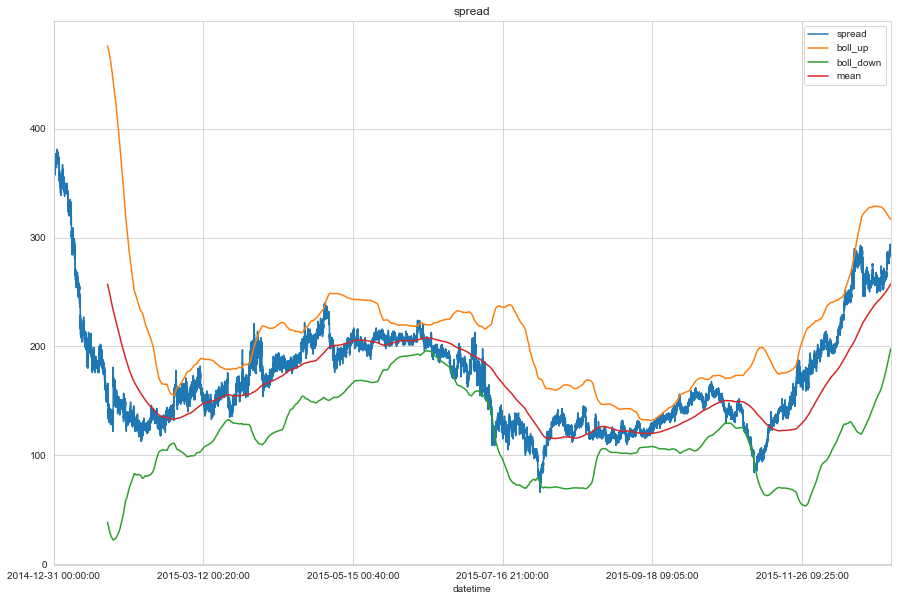

In [5]:
export_df_datetime['2014':'2016'][['spread','boll_up','boll_down','mean']].plot(figsize=(15,10),title='spread')

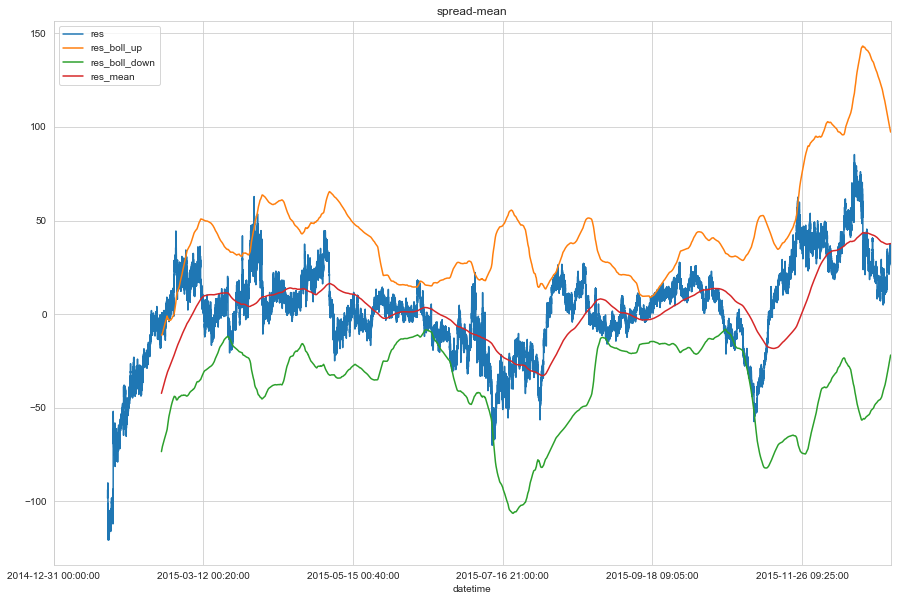

In [6]:
export_df_datetime['2014':'2016'][['res','res_boll_up','res_boll_down','res_mean']].plot(figsize=(15,10),title='spread-mean')

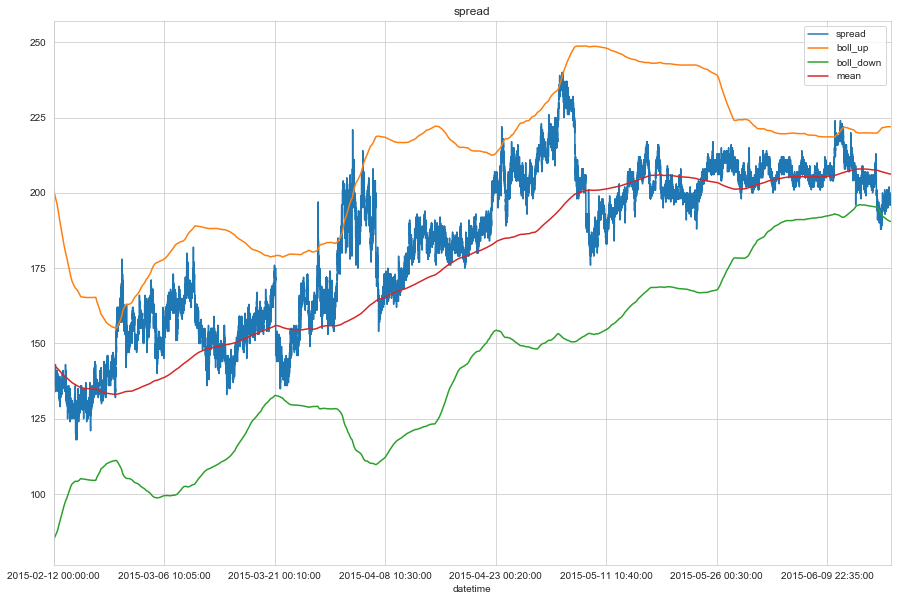

In [7]:
export_df_datetime['2015-02-12':'2015-06-18'][['spread','boll_up','boll_down','mean']].plot(figsize=(15,10),title='spread')

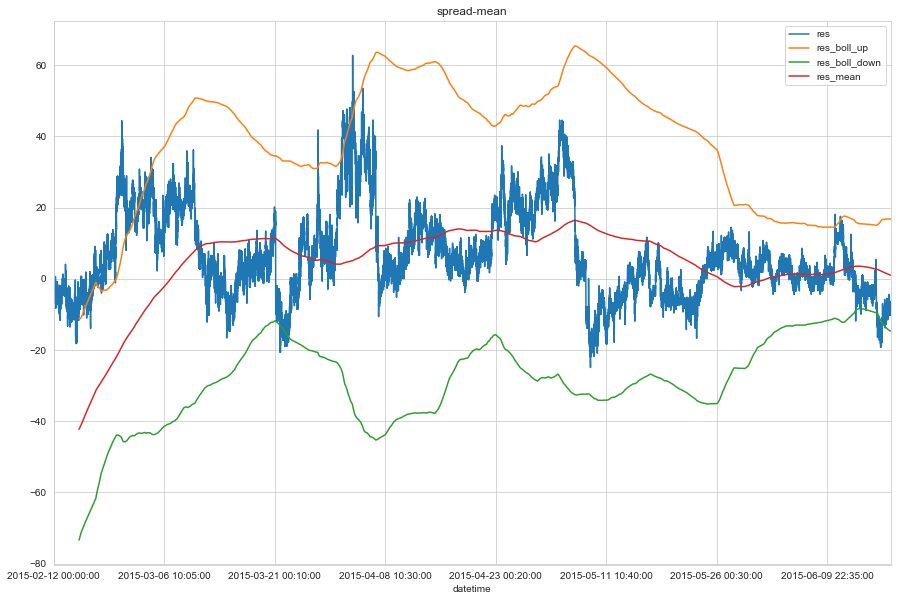

In [8]:
export_df_datetime['2015-02-12':'2015-06-18'][['res','res_boll_up','res_boll_down','res_mean']].plot(figsize=(15,10),title='spread-mean')

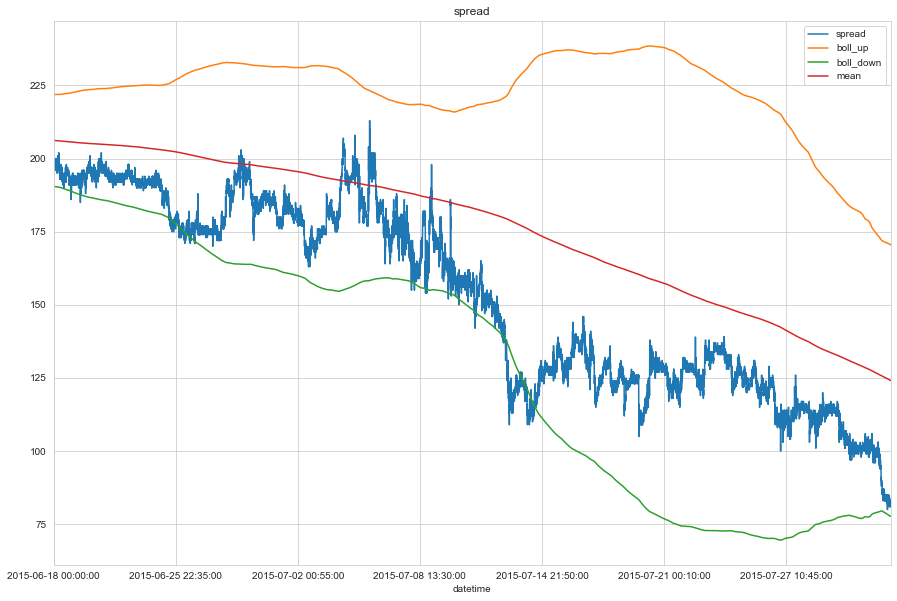

In [9]:
# 从该图中可以看出轨道的宽度变化有很大的滞后性
export_df_datetime['2015-06-18':'2015-07-31'][['spread','boll_up','boll_down','mean']].plot(figsize=(15,10),title='spread')

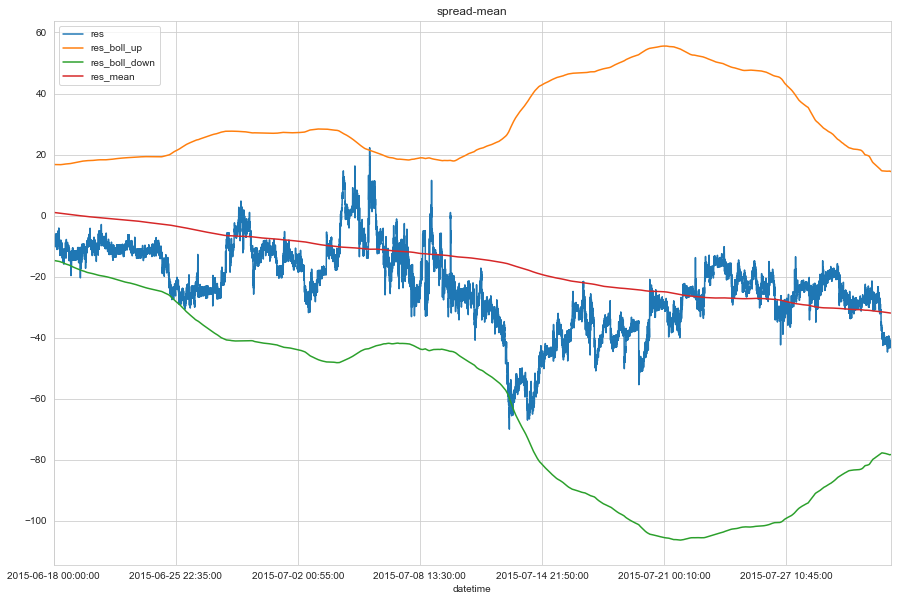

In [10]:
# 从该图中可以看出轨道的宽度变化有很大的滞后性
export_df_datetime['2015-06-18':'2015-07-31'][['res','res_boll_up','res_boll_down','res_mean']].plot(figsize=(15,10),title='spread-mean')

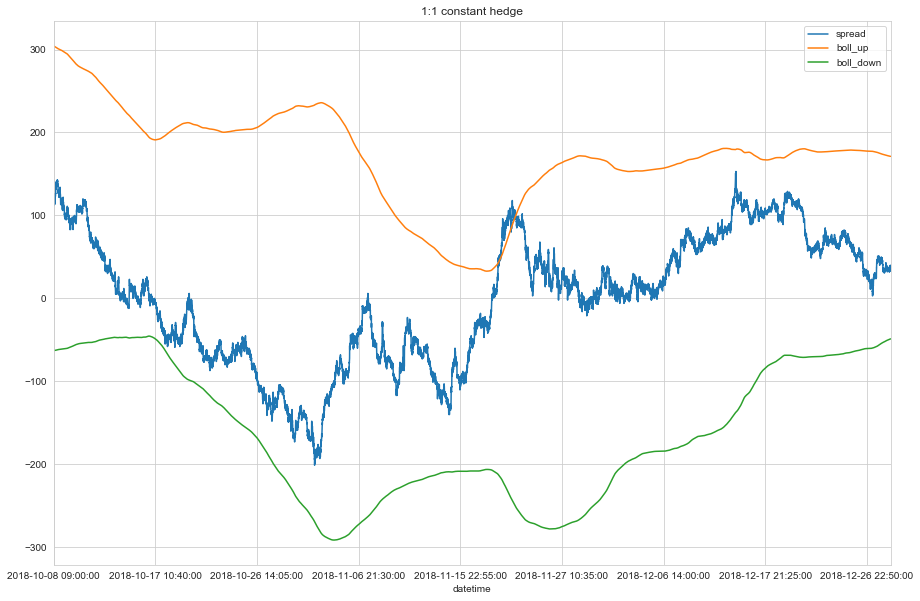

In [11]:
# 和动态ratio的经过对比，发现粗略的动态ratio效果并不好，没法完成减少残差波动的效果
export_df_datetime['2018-09-31':'2018-12-31'][['spread','boll_up','boll_down']].plot(figsize=(15,10),title='1:1 constant hedge')

粗略来看在1:1和mean过滤之后，效果是有所提升的

In [12]:
export_df.dropna(inplace=True)

In [13]:
export_df.head()

,datetime,spread,volume,mean,std,boll_up,boll_down,res,res_mean,res_std,res_boll_up,res_boll_down
14400,2015-02-16 14:00:00,130.0,18.0,135.626944,10.370082,166.737191,104.516697,-5.626944,-42.274501,29.870301,-11.164254,-73.384748
14401,2015-02-16 14:01:00,129.0,48.0,135.622917,10.366635,166.722821,104.523013,-6.622917,-42.261640,29.866144,-11.161736,-73.361544
14402,2015-02-16 14:02:00,128.0,4.0,135.618750,10.363266,166.708549,104.528951,-7.618750,-42.248922,29.861820,-11.159124,-73.338721
14403,2015-02-16 14:03:00,129.0,16.0,135.614444,10.359990,166.694416,104.534473,-6.614444,-42.236346,29.857335,-11.156375,-73.316318
14404,2015-02-16 14:04:00,130.0,8.0,135.610000,10.355962,166.677887,104.542113,-5.610000,-42.223913,29.853526,-11.156026,-73.291800


In [14]:
# 计算信号的触发
#  对信号触发个数，横截面信息进行深入的挖掘
export_df['touch_up'] = np.where(export_df['spread']>=export_df['boll_up'],1,0)
export_df['touch_down'] = np.where(export_df['spread']<=export_df['boll_down'],1,0)
export_df['res_touch_up'] = np.where(export_df['res']>=export_df['res_boll_up'],1,0)
export_df['res_touch_down'] = np.where(export_df['res']<=export_df['res_boll_down'],1,0)

# 统计信号发生的间隔
export_df['ind'] = np.arange(export_df.shape[0])


touch_up_interval = export_df.loc[export_df['touch_up']==1]['ind'].diff()
touch_down_interval = export_df.loc[export_df['touch_down']==1]['ind'].diff()

res_touch_up_interval = export_df.loc[export_df['res_touch_up']==1]['ind'].diff()
res_touch_down_interval = export_df.loc[export_df['res_touch_down']==1]['ind'].diff()

In [15]:
touch_up_interval.describe()

count     5854.000000
mean        62.374445
std       1205.273727
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      42963.000000
Name: ind, dtype: float64

In [16]:
touch_down_interval.describe()

count     3766.000000
mean        76.968933
std       1630.448795
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      68783.000000
Name: ind, dtype: float64

In [17]:
res_touch_up_interval.describe()

count     9938.000000
mean        36.908533
std       1023.390515
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      64432.000000
Name: ind, dtype: float64

In [18]:
res_touch_down_interval.describe()

count     6083.000000
mean        59.856157
std       1298.036076
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      61368.000000
Name: ind, dtype: float64

In [22]:
import collections

Tradedata= collections.namedtuple('tradedata', ['trade_return','trade_type','trade_interval','start_date','close_date'])

In [19]:
touch_up_ind = export_df.loc[export_df['touch_up']==1]['ind']
touch_up_interval = export_df.loc[export_df['touch_up']==1]['ind'].diff()
touch_up_df = pd.DataFrame({'touch_up_ind':touch_up_ind,'touch_up_interval':touch_up_interval})


touch_up_df.reset_index(inplace=True)

touch_down_ind = export_df.loc[export_df['touch_down']==1]['ind']
touch_down_interval = export_df.loc[export_df['touch_down']==1]['ind'].diff()

touch_down_df = pd.DataFrame({'touch_down_ind':touch_down_ind,'touch_down_interval':touch_down_interval})
touch_down_df.reset_index(inplace=True)

In [20]:
res_touch_up_ind = export_df.loc[export_df['res_touch_up']==1]['ind']
res_touch_up_interval = export_df.loc[export_df['res_touch_up']==1]['ind'].diff()
res_touch_up_df = pd.DataFrame({'res_touch_up_ind':res_touch_up_ind,'res_touch_up_interval':res_touch_up_interval})


res_touch_up_df.reset_index(inplace=True)

res_touch_down_ind = export_df.loc[export_df['res_touch_down']==1]['ind']
res_touch_down_interval = export_df.loc[export_df['res_touch_down']==1]['ind'].diff()

res_touch_down_df = pd.DataFrame({'res_touch_down_ind':res_touch_down_ind,'res_touch_down_interval':res_touch_down_interval})
res_touch_down_df.reset_index(inplace=True)

In [30]:
ind =1
# 模拟回测基于信号；需要3个元素：止损点位，持仓时间，止盈点位
# 可以进行各种灵活的设置，注意时间顺序，和不能逐个循环，应安装交易信号触发循环
# 数据储存需要设计一个数据类型
# 持有周期
hold_ind = 20
profit_pct = 0.05
exit_pct = - 0.01

trade_record = []
while ind + hold_ind < touch_up_df.shape[0]:
    touch_up_interval = touch_up_df.iloc[ind,2]
    touch_up_ind = touch_up_df.iloc[ind,1]
    # 滞后买入
    open_position_ind = int(touch_up_ind + 1)
    # 要多拿一根bar的数据
    slice_df = export_df.iloc[open_position_ind:open_position_ind+hold_ind+2]
    # 买入后收益return
    pct_array = (slice_df['spread']-slice_df['spread'].iloc[0])/slice_df['spread'].iloc[0]

    #计算是否触碰止盈
    if np.where(pct_array[:-1]>=profit_pct)[0].size>0:
        profit_ind = np.where(pct_array[:-1]>=profit_pct)[0][0]
    else:
        profit_ind = None
    #计算是否触碰止损    
    if np.where(pct_array[:-1]<=exit_pct)[0].size>0:
        exit_ind = np.where(pct_array[:-1]<=exit_pct)[0][0]
    else:
        exit_ind = None

    # 计算最终收益
    # 由于是达到止盈之后，下一根bar才成交，因此最终的收益并不是就是大于等于止盈return的

    # 触及止盈和止损点位
    if profit_ind and exit_ind:
        if profit_ind<exit_ind:
            # 下一根bar
            trade_rertun = pct_array.iloc[profit_ind+1]
            trade_type =  'profit_exit'
            trade_interval = profit_ind
        else:
            trade_rertun = pct_array.iloc[exit_ind+1]
            trade_type = 'loss_exit'
            trade_interval = exit_ind

    # 止盈和止损都没触及

    elif not profit_ind and not exit_ind:
        trade_rertun = pct_array.iloc[-1]
        trade_type = 'time_exit'
        trade_interval = hold_ind

    # 只触及止盈

    elif profit_ind and not exit_ind:
        trade_rertun = pct_array.iloc[profit_ind+1]
        trade_type =  'profit_exit'
        trade_interval = profit_ind
    # 只触及止损

    elif not profit_ind and exit_ind:
        trade_rertun = pct_array.iloc[exit_ind+1]
        trade_type = 'loss_exit'
        trade_interval = exit_ind
    start_date = slice_df.iloc[0]['datetime']
    end_date = slice_df.iloc[trade_interval]['datetime']
    tradedata = Tradedata(trade_rertun,trade_type,trade_interval,start_date,end_date)
    trade_record.append(tradedata)
    ind = ind+trade_interval

In [31]:
loss_record = []
profit_record = []
time_record = []


for trade in trade_record:
    
    if trade.trade_type=='loss_exit':
        loss_record.append(trade)
    elif trade.trade_type=='time_exit':
        time_record.append(trade)    
    elif trade.trade_type == 'profit_exit':
        profit_record.append(trade)
    

In [32]:
len(loss_record),len(profit_record),len(time_record)

(478, 170, 157)

In [33]:
# loss 是否具有一些特征？
# 总的收益如何？
return_array = []
interval_array = []
for trade in trade_record:
    return_array.append(trade.trade_return)
    interval_array.append(trade.trade_interval)

return_array = np.array(return_array)+1
boll_up_buy_return_series =pd.Series(return_array.cumprod())


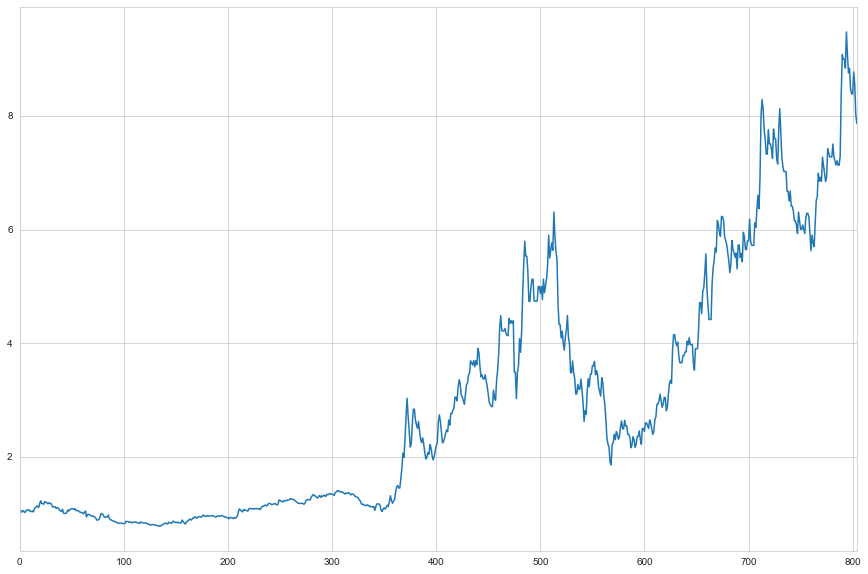

In [27]:
# 中间有大回撤
# 回撤多为连续的是否有什么原因？
#亏损时间
# 没有考虑到手续费问题
boll_up_buy_return_series.plot(figsize=(15,10))

In [34]:
ind =1
# 模拟回测基于信号；需要3个元素：止损点位，持仓时间，止盈点位
# 可以进行各种灵活的设置，注意时间顺序，和不能逐个循环，应安装交易信号触发循环
# 数据储存需要设计一个数据类型
# 持有周期
hold_ind = 20
profit_pct = 0.05
exit_pct = - 0.01

trade_record = []
while ind + hold_ind < res_touch_up_df.shape[0]:
    res_touch_up_interval = res_touch_up_df.iloc[ind,2]
    res_touch_up_ind = res_touch_up_df.iloc[ind,1]
    # 滞后买入
    open_position_ind = int(res_touch_up_ind + 1)
    # 要多拿一根bar的数据
    slice_df = export_df.iloc[open_position_ind:open_position_ind+hold_ind+2]
    # 买入后收益return
    pct_array = (slice_df['spread']-slice_df['spread'].iloc[0])/slice_df['spread'].iloc[0]

    #计算是否触碰止盈
    if np.where(pct_array[:-1]>=profit_pct)[0].size>0:
        profit_ind = np.where(pct_array[:-1]>=profit_pct)[0][0]
    else:
        profit_ind = None
    #计算是否触碰止损    
    if np.where(pct_array[:-1]<=exit_pct)[0].size>0:
        exit_ind = np.where(pct_array[:-1]<=exit_pct)[0][0]
    else:
        exit_ind = None

    # 计算最终收益
    # 由于是达到止盈之后，下一根bar才成交，因此最终的收益并不是就是大于等于止盈return的

    # 触及止盈和止损点位
    if profit_ind and exit_ind:
        if profit_ind<exit_ind:
            # 下一根bar
            trade_rertun = pct_array.iloc[profit_ind+1]
            trade_type =  'profit_exit'
            trade_interval = profit_ind
        else:
            trade_rertun = pct_array.iloc[exit_ind+1]
            trade_type = 'loss_exit'
            trade_interval = exit_ind

    # 止盈和止损都没触及

    elif not profit_ind and not exit_ind:
        trade_rertun = pct_array.iloc[-1]
        trade_type = 'time_exit'
        trade_interval = hold_ind

    # 只触及止盈

    elif profit_ind and not exit_ind:
        trade_rertun = pct_array.iloc[profit_ind+1]
        trade_type =  'profit_exit'
        trade_interval = profit_ind
    # 只触及止损

    elif not profit_ind and exit_ind:
        trade_rertun = pct_array.iloc[exit_ind+1]
        trade_type = 'loss_exit'
        trade_interval = exit_ind
    start_date = slice_df.iloc[0]['datetime']
    end_date = slice_df.iloc[trade_interval]['datetime']
    tradedata = Tradedata(trade_rertun,trade_type,trade_interval,start_date,end_date)
    trade_record.append(tradedata)
    ind = ind+trade_interval

In [35]:
# loss 是否具有一些特征？
# 总的收益如何？
return_array = []
interval_array = []
for trade in trade_record:
    return_array.append(trade.trade_return)
    interval_array.append(trade.trade_interval)

return_array = np.array(return_array)+1
boll_up_buy_return_series =pd.Series(return_array.cumprod())


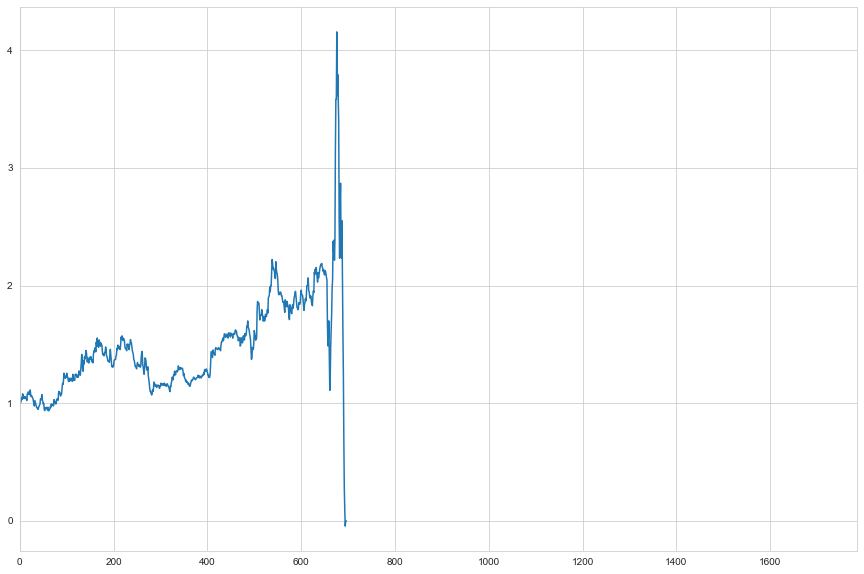

In [36]:
# 中间有大回撤
# 回撤多为连续的是否有什么原因？
#亏损时间
boll_up_buy_return_series.plot(figsize=(15,10))

2020-05-18 08:19:00.642711	开始加载历史数据
2020-05-18 08:19:02.464094	HC888.SHFE加载进度：### [33%]
2020-05-18 08:19:03.928242	HC888.SHFE加载进度：###### [66%]
2020-05-18 08:19:05.822070	HC888.SHFE加载进度：######### [99%]
2020-05-18 08:19:05.919805	HC888.SHFE加载进度：########## [100%]
2020-05-18 08:19:05.920803	HC888.SHFE历史数据加载完成，数据量：26491
2020-05-18 08:19:07.774249	RB888.SHFE加载进度：### [33%]
2020-05-18 08:19:09.159140	RB888.SHFE加载进度：###### [66%]
2020-05-18 08:19:11.012233	RB888.SHFE加载进度：######### [99%]
2020-05-18 08:19:11.124639	RB888.SHFE加载进度：########## [100%]
2020-05-18 08:19:11.124639	RB888.SHFE历史数据加载完成，数据量：26491
2020-05-18 08:19:11.124639	所有历史数据加载完成
时间2015-01-26 09:00:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差145.0
时间2015-01-26 09:12:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差154.0
时间2015-01-26 09:24:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差145.0
时间2015-01-26 09:35:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差138.0
时间2015-01-26 09:46:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差141.0
时间2015-01-26 09:57:00 多开

时间2015-02-02 09:44:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差133.0
时间2015-02-02 09:56:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差135.0
时间2015-02-02 10:10:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差133.0
时间2015-02-02 10:43:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差132.0
时间2015-02-02 10:54:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差128.0
时间2015-02-02 11:05:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差129.0
时间2015-02-02 11:16:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差125.0
时间2015-02-02 11:27:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差127.0
时间2015-02-02 13:38:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差129.0
时间2015-02-02 13:49:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差132.0
时间2015-02-02 14:02:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差134.0
时间2015-02-02 14:15:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差133.0
时间2015-02-02 14:26:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差131.0
时间2015-02-02 14:39:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差135.0
时间2015-02-02 14:51:00 多开    多HC888.SHFE 1 手 空RB8

时间2015-02-10 09:00:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差127.0
时间2015-02-10 11:10:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差122.0
时间2015-02-10 21:05:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差125.0
时间2015-02-10 23:23:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差129.0
时间2015-02-11 09:15:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差131.0
时间2015-02-11 11:29:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差131.0
时间2015-02-11 21:21:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差139.0
时间2015-02-11 23:20:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差136.0
时间2015-02-12 09:16:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差139.0
时间2015-02-12 13:34:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差136.0
时间2015-02-12 21:36:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差133.0
时间2015-02-12 23:33:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差138.0
时间2015-02-13 09:28:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差138.0
时间2015-02-13 11:07:00 多平 止损 平多HC888.SHFE 1 手 平空RB888.SHFE 1 手 价差125.0
时间2015-02-13 11:19:00 多开    多HC888.SHFE 1 手 空R

时间2015-03-24 00:51:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差144.0
时间2015-03-24 10:58:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差140.0
时间2015-03-24 14:50:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差151.0
时间2015-03-24 22:48:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差154.0
时间2015-03-25 00:59:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差151.0
时间2015-03-25 09:44:00 多平 止损 平多HC888.SHFE 1 手 平空RB888.SHFE 1 手 价差146.0
时间2015-03-25 10:02:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差151.0
时间2015-03-25 14:11:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差156.0
时间2015-03-25 22:33:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差171.0
时间2015-03-26 09:02:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差163.0
时间2015-03-26 11:12:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差162.0
时间2015-03-26 13:35:00 多平 止损 平多HC888.SHFE 1 手 平空RB888.SHFE 1 手 价差153.0
时间2015-03-26 13:47:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差153.0
时间2015-03-26 21:43:00 多开    多HC888.SHFE 1 手 空RB888.SHFE 1 手 价差161.0
时间2015-03-26 23:37:00 多开    多HC888.SHFE 1 手 

c:\vnstudio\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


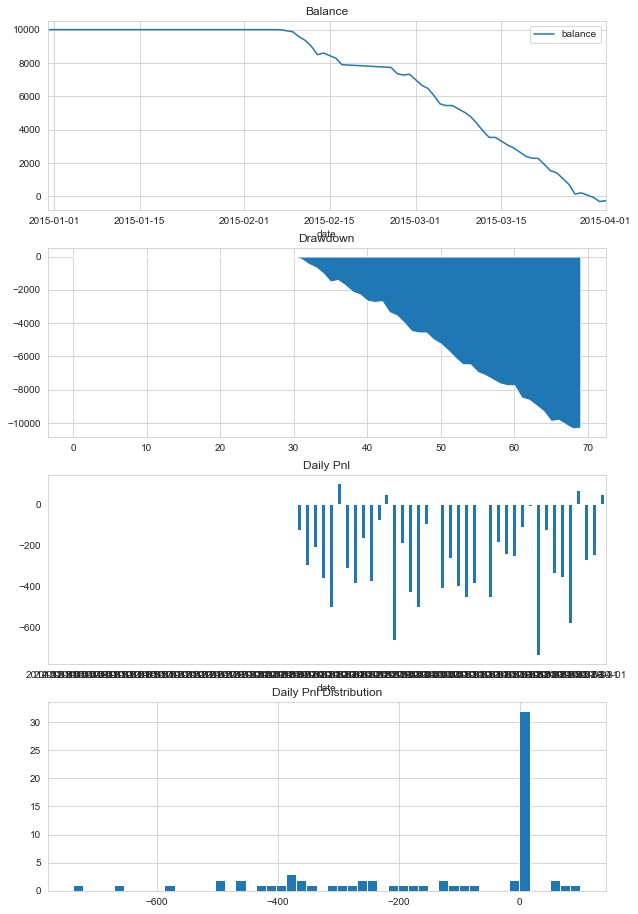

In [2]:
from datetime import datetime
from vnpy.app.portfolio_strategy import BacktestingEngine
from vnpy.trader.constant import Interval
# from residualstrategy_simple import DynamicResidualModelStrategy
from simple_strategy_1_1 import DynamicResidualModelStrategy
# from residualstrategy_simple_with_moving_exit import DynamicResidualModelStrategy
# from trend_following_version1 import ATR_RSI_Strategy
# from portfolio_signals import TredningFollowingSignals
# from portfolio_masignals import MASignals
# from portfolio_macdsignals import MACDSignals


#%%
#
engine = BacktestingEngine()

engine.set_parameters(
    vt_symbols=["HC888.SHFE", 'RB888.SHFE'],
    interval=Interval.MINUTE,
    start=datetime(2014, 12, 31 ),
    end=datetime(2015,4, 1),
    rates={"HC888.SHFE": 5/10000, "RB888.SHFE": 5/10000},
    slippages={"HC888.SHFE":2, "RB888.SHFE": 1},
    sizes={"HC888.SHFE":10, "RB888.SHFE":10},
    priceticks={"HC888.SHFE":2, "RB888.SHFE":1},
    capital=1_000_0,
    collection_names={"HC888.SHFE":"HC888", "RB888.SHFE":"RB888"}

)
engine.add_strategy(DynamicResidualModelStrategy, {'profit_pct':1,'boll_up_cum_threshold':10 })
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()


In [12]:
same_direction_symbol= engine.strategy.y_symbol.split('.')[0]
inverse_direction_symbol= engine.strategy.x_symbol.split('.')[0]
datetime_list = []
direction_list = []
offset_list = []
volume_list = []
price_list = []
for trade in engine.trades.values():

    if trade.symbol == same_direction_symbol:
        datetime = trade.datetime
        direction = trade.direction.value
        offset = trade.offset.value
        volume = trade.volume
        price = trade.price
        
        datetime_list.append(datetime)
        direction_list.append(direction)
        offset_list.append(offset)
        volume_list.append(volume)
        price_list.append(price)
    same_direction_df = pd.DataFrame({'datetime':datetime_list,'direction':direction_list,'offset':offset_list,'volume':volume_list,'price':price_list})
    same_direction_df['symbol'] = same_direction_symbol

In [13]:
datetime_list = []
direction_list = []
offset_list = []
volume_list = []
price_list = []
for trade in engine.trades.values():  
    if trade.symbol == inverse_direction_symbol:
        
        datetime = trade.datetime
        direction = trade.direction.value
        offset = trade.offset.value
        volume = trade.volume
        price = trade.price
       
        datetime_list.append(datetime)
        direction_list.append(direction)
        offset_list.append(offset)
        volume_list.append(volume)
        price_list.append(price)
        
    inverse_direction_df = pd.DataFrame({'datetime':datetime_list,'direction':direction_list,'offset':offset_list,'volume':volume_list,'price':price_list})
    inverse_direction_df['symbol'] = inverse_direction_symbol
    

In [14]:
combine_trade_df = pd.merge(left=same_direction_df,right=inverse_direction_df,left_on=['datetime','offset'],right_on=['datetime','offset'],suffixes=('_y', '_x'))

if combine_trade_df.shape[0] % 2 != 0 :
    
    traded_num = (combine_trade_df.shape[0] -1)
else:
    traded_num = combine_trade_df.shape[0]

start_ind = np.arange(0,traded_num,2)
end_ind = start_ind + 1

trades_analyze_df = pd.DataFrame({},columns=['open_date','close_date','direction','open_spread','close_spread','y_profit','x_profit'])
for ind in np.arange(start_ind.shape[0]):   
    one_trade_df = combine_trade_df.iloc[start_ind[ind]:end_ind[ind]+1]
    if one_trade_df.iloc[0,1] == '多':
        
        y_profit = one_trade_df['price_y'].diff().iloc[-1]*one_trade_df['volume_y'].iloc[0]
        x_profit = -one_trade_df['price_x'].diff().iloc[-1]*one_trade_df['volume_x'].iloc[0]
    
    else:
        y_profit = -one_trade_df['price_y'].diff()*one_trade_df['volume_y'].iloc[0]
        x_profit = one_trade_df['price_x'].diff()*one_trade_df['volume_x'].iloc[0]
    start_spread = one_trade_df['price_y'].iloc[0]*one_trade_df['volume_y'].iloc[0]-one_trade_df['price_x'].iloc[0]*one_trade_df['volume_x'].iloc[0]
    close_spread = one_trade_df['price_y'].iloc[1]*one_trade_df['volume_y'].iloc[1]-one_trade_df['price_x'].iloc[1]*one_trade_df['volume_x'].iloc[1]
    start_datetime = one_trade_df['datetime'].iloc[0]
    end_datetime = one_trade_df['datetime'].iloc[1]
    direction = one_trade_df['direction_y'].iloc[0]
    trades_analyze_df = trades_analyze_df.append({'open_date':start_datetime,'close_date':end_datetime,
                                                  'direction':direction,
                                                  'open_spread':start_spread,
                                                  'close_spread':close_spread,
                                                  'y_profit':y_profit,
                                                  'x_profit':x_profit},ignore_index=True)
    


trades_analyze_df['total_profit'] = (trades_analyze_df['y_profit']+trades_analyze_df['x_profit'])*np.where(trades_analyze_df['direction']=='多',1,-1)

In [22]:
traded_num

276

In [23]:
np.sum(np.where(combine_trade_df['offset']=='开',1,0))

138

In [24]:
np.sum(np.where(combine_trade_df['offset']=='平',1,0))

138

In [45]:
i = 0
while i <combine_trade_df.shape[0]:
    if combine_trade_df.iloc[i,2] == '开' and combine_trade_df.iloc[i+1,2]=='平':
        
        i = i+2
    else:
        print(i)
        break
#检查出报单错误c       

230


In [46]:
combine_trade_df

,datetime,direction_y,offset,volume_y,price_y,symbol_y,direction_x,volume_x,price_x,symbol_x
0,2015-02-07 00:27:00,多,开,1,686.0,HC888,空,1,565.0,RB888
1,2015-02-09 10:08:00,空,平,1,676.0,HC888,多,1,548.0,RB888
2,2015-02-09 10:34:00,多,开,1,680.0,HC888,空,1,551.0,RB888
3,2015-02-09 14:15:00,空,平,1,682.0,HC888,多,1,551.0,RB888
4,2015-02-09 14:40:00,多,开,1,678.0,HC888,空,1,551.0,RB888
...,...,...,...,...,...,...,...,...,...,...
271,2015-03-31 22:09:00,多,开,1,580.0,HC888,空,1,380.0,RB888
272,2015-03-31 22:55:00,空,平,1,560.0,HC888,多,1,373.0,RB888
273,2015-03-31 23:07:00,多,开,1,564.0,HC888,空,1,373.0,RB888
274,2015-03-31 23:34:00,空,平,1,558.0,HC888,多,1,378.0,RB888


In [37]:
combine_trade_df.iloc[220:]
# row 229 230 一共平了两次

,datetime,direction_y,offset,volume_y,price_y,symbol_y,direction_x,volume_x,price_x,symbol_x
220,2015-03-23 22:58:00,多,开,1,676.0,HC888,空,1,536.0,RB888
221,2015-03-24 00:39:00,空,平,1,674.0,HC888,多,1,535.0,RB888
222,2015-03-24 00:52:00,多,开,1,678.0,HC888,空,1,535.0,RB888
223,2015-03-24 10:48:00,空,平,1,666.0,HC888,多,1,526.0,RB888
224,2015-03-24 10:59:00,多,开,1,658.0,HC888,空,1,519.0,RB888
225,2015-03-24 14:40:00,空,平,1,676.0,HC888,多,1,519.0,RB888
226,2015-03-24 14:51:00,多,开,1,670.0,HC888,空,1,520.0,RB888
227,2015-03-24 22:32:00,空,平,1,660.0,HC888,多,1,507.0,RB888
228,2015-03-24 22:49:00,多,开,1,662.0,HC888,空,1,509.0,RB888
229,2015-03-25 00:30:00,空,平,1,664.0,HC888,多,1,515.0,RB888


In [31]:
combine_trade_df

,datetime,direction_y,offset,volume_y,price_y,symbol_y,direction_x,volume_x,price_x,symbol_x
0,2015-02-07 00:27:00,多,开,1,686.0,HC888,空,1,565.0,RB888
1,2015-02-09 10:08:00,空,平,1,676.0,HC888,多,1,548.0,RB888
2,2015-02-09 10:34:00,多,开,1,680.0,HC888,空,1,551.0,RB888
3,2015-02-09 14:15:00,空,平,1,682.0,HC888,多,1,551.0,RB888
4,2015-02-09 14:40:00,多,开,1,678.0,HC888,空,1,551.0,RB888
...,...,...,...,...,...,...,...,...,...,...
271,2015-03-31 22:09:00,多,开,1,580.0,HC888,空,1,380.0,RB888
272,2015-03-31 22:55:00,空,平,1,560.0,HC888,多,1,373.0,RB888
273,2015-03-31 23:07:00,多,开,1,564.0,HC888,空,1,373.0,RB888
274,2015-03-31 23:34:00,空,平,1,558.0,HC888,多,1,378.0,RB888


In [50]:
engine.__dir__()

['vt_symbols',
 'start',
 'end',
 'rates',
 'slippages',
 'sizes',
 'priceticks',
 'collection_names',
 'capital',
 'strategy',
 'bars',
 'datetime',
 'interval',
 'days',
 'history_data',
 'dts',
 'limit_order_count',
 'limit_orders',
 'active_limit_orders',
 'trade_count',
 'trades',
 'logs',
 'daily_results',
 'daily_df',
 '__module__',
 '__doc__',
 'gateway_name',
 '__init__',
 'clear_data',
 'set_parameters',
 'add_strategy',
 'load_data',
 'run_backtesting',
 'calculate_result',
 'calculate_statistics',
 'show_chart',
 'update_daily_close',
 'new_bars',
 'cross_limit_order',
 'load_bars',
 'send_order',
 'cancel_order',
 'write_log',
 'send_email',
 'sync_strategy_data',
 'put_strategy_event',
 'output',
 'get_all_trades',
 'get_all_orders',
 'get_all_daily_results',
 '__dict__',
 '__weakref__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__new__',
 '__reduce_ex__',
